# Analysis 5

In [2]:
import pandas as pd
import numpy as np
import json
from collections import Counter
import operator
from ast import literal_eval
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%pylab inline
import httplib

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [5]:
with open('./data/team_top_scorer.json') as json_data:
    team_top_scorer = json.load(json_data)

In [6]:
stadiums = pd.read_csv('./data/stadiums.csv')

df_team_top_scorer = pd.DataFrame(columns = ['team','top_scorer','goals','stadium','latitude','longitude'], 
                          index = np.arange(0,len(team_top_scorer),1))



for i in range(len(team_top_scorer)):
    df_team_top_scorer.team[i] = team_top_scorer.keys()[i]
    df_team_top_scorer.top_scorer[i] = team_top_scorer.values()[i].keys()[0]
    df_team_top_scorer.goals[i] = team_top_scorer.values()[i].values()[0]
    df_team_top_scorer.stadium[i] = stadiums.Name[stadiums.Team == team_top_scorer.keys()[i]].reset_index(drop = True).ix[0] 
    df_team_top_scorer.latitude[i] = stadiums.Latitude[stadiums.Team == team_top_scorer.keys()[i]].reset_index(drop = True).ix[0] 
    df_team_top_scorer.longitude[i] = stadiums.Longitude[stadiums.Team == team_top_scorer.keys()[i]].reset_index(drop = True).ix[0] 


In [96]:
import seaborn as sn

In [102]:
z = df_team_top_scorer.goals.values[0:-1]
z

array([139, 26, 5, 57, 58, 20, 68, 27, 14, 92, 8, 12, 47, 49, 24, 9, 12,
       48, 74, 22, 10, 9, 18, 8, 20, 34, 135, 32, 23, 89, 40, 37, 132, 20,
       29, 20], dtype=object)

In [136]:
df_team_top_scorer.team

0        Manchester United
1               Stoke City
2                  Watford
3          Manchester City
4              Aston Villa
5             Swansea City
6         Bolton Wanderers
7     West Bromwich Albion
8                  Reading
9                Liverpool
10                 Burnley
11               Blackpool
12                  Fulham
13                 Everton
14             Middlesboro
15            Derby County
16          Leicester City
17             Southampton
18        Newcastle United
19            Norwich City
20            Ipswich Town
21               Hull City
22          Wigan Athletic
23     Queens Park Rangers
24           Wolverhampton
25        Blackburn Rovers
26                 Chelsea
27       Charlton Athletic
28              Portsmouth
29       Tottenham Hotspur
30            Leeds United
31         West Ham United
32                 Arsenal
33          Crystal Palace
34              Sunderland
35              Birmingham
36        Sheffield United
N

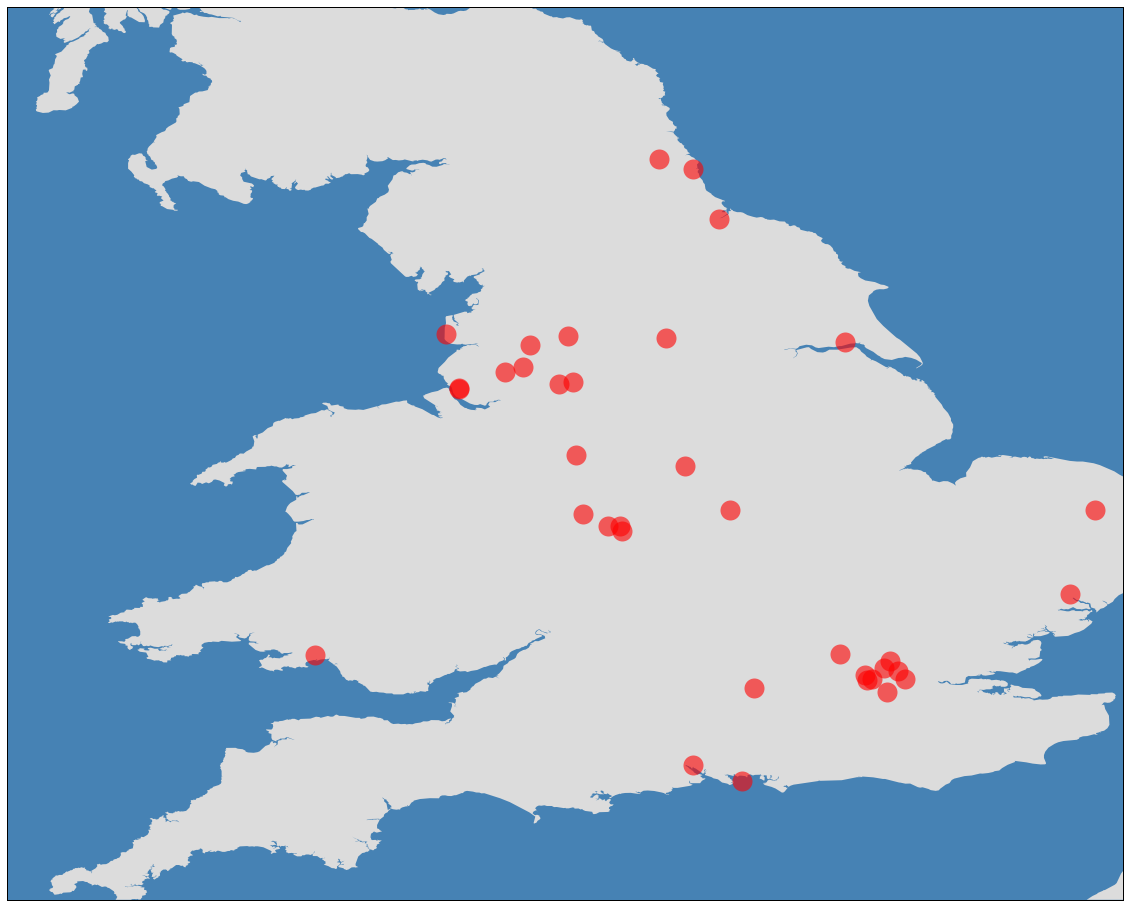

In [176]:
x = df_team_top_scorer.latitude.values[0:-1]
y = df_team_top_scorer.longitude.values[0:-1]
z = df_team_top_scorer.goals.values[0:-1]

col = sns.light_palette("red",39)
plt.figure(figsize=(20,20))

themap = Basemap(#projection='merc',#projection='gall',
              llcrnrlon = -6,              # lower-left corner longitude
              llcrnrlat = 50,               # lower-left corner latitude
              urcrnrlon = 1.5,               # upper-right corner longitude
              urcrnrlat = 56,               # upper-right corner latitude
              resolution = 'h',
              area_thresh = 100000.0)#,projection='lcc')

themap.drawcountries()
themap.fillcontinents(color = 'gainsboro')
themap.drawmapboundary(fill_color='steelblue')
# m.drawparallels(np.arange(-6,1.5,2.))
# m.drawmeridians(np.arange(50,56,2.))
# themap.bluemarble()


# plt.figure(figsize=(20,20))
# im = plt.imread('map.png')
# implot = plt.imshow(im)


xx, yy = themap(x, y)


for i in range(len(yy)):
    themap.plot(yy[i], xx[i], 
            'o',                    # marker shape
            color = 'red',#sns.color_palette("RdBu_r", 139)[139-z[i]],         # marker colour
#             markersize=(1300./139)*np.log(z[i])
                markersize = 20
            ,label = 'team',alpha=0.6)
#     plt.text(yy[i], xx[i], df_team_top_scorer.index[i], ha="center", va="center"
#              , rotation=0,
#             size=12,color = 'black')
#     plt.annotate(df_team_top_scorer.index[i], xy=(yy[i], xx[i] + 0),
#                  xytext=(yy[i], xx[i] + .1), 
#                 arrowprops=dict(facecolor='black'), 
#                 horizontalalignment='left', verticalalignment='top')

In [153]:
text_x[29], text_y[29]

(51.603299999999997, -0.065684000000000006)

IOError: cannot locate ../sample_files/comarques.shp

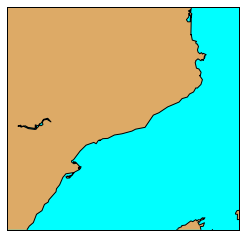

In [12]:
map = Basemap(llcrnrlon=-0.5,llcrnrlat=39.8,urcrnrlon=4.,urcrnrlat=43.,
resolution='i', projection='tmerc', lat_0 = 39.5, lon_0 = 1)
map.drawmapboundary(fill_color='aqua')
map.fillcontinents(color='#ddaa66',lake_color='aqua')
map.drawcoastlines()
map.readshapefile('../sample_files/comarques', 'comarques')
plt.show()


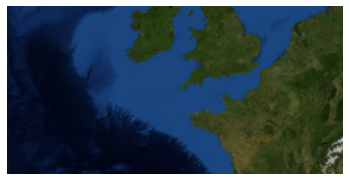

In [36]:
m = Basemap(width=2000000,height=1000000,projection='lcc',
            resolution=None,lat_1=1.5,lat_2=56,lat_0=50,lon_0=-6.)
m.bluemarble()
plt.show()

In [71]:
import plotly.plotly as py


In [ ]:
# import pandas as pd

# df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')

# for col in df.columns:
#     df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]

# df['text'] = df['state'] + '<br>' +\
#     'Beef '+df['beef']+' Dairy '+df['dairy']+'<br>'+\
#     'Fruits '+df['total fruits']+' Veggies ' + df['total veggies']+'<br>'+\
#     'Wheat '+df['wheat']+' Corn '+df['corn']

data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = df['code'],
        z = df['total exports'].astype(float),
        locationmode = 'USA-states',
        text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Millions USD")
        ) ]

layout = dict(
        title = '2011 US Agriculture Exports by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

In [73]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')


In [75]:
df_team_top_scorer.head()

,team,top_scorer,goals,stadium,latitude,longitude
0,Manchester United,Rooney,139,Old Trafford,53.4631,-2.29139
1,Stoke City,Walters,26,Britannia Stadium,52.9884,-2.17542
2,Watford,Bouazza,5,Vicarage Road,51.6498,-0.401569
3,Manchester City,Tevez,57,Etihad Stadium,53.483,-2.20024
4,Aston Villa,Agbonlahor,58,Villa Park,52.5092,-1.88508


In [79]:
# df['text'] = df['airport'] + '' + df['city'] + ', ' + df['state'] + '' + 'Arrivals: ' + df['cnt'].astype(str)




llcrnrlon = -6,              # lower-left corner longitude
              llcrnrlat = 50,               # lower-left corner latitude
              urcrnrlon = 1.5,               # upper-right corner longitude
              urcrnrlat = 56,               # upper-right corner latitude
              resolution = 'h',
                
                
                
scl = [ [0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
    [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"] ]

data = [ dict(
        type = 'scattergeo',
        locationmode = 'UK',
        lon = df_team_top_scorer['longitude'],
        lat = df_team_top_scorer['latitude'],
        text = df_team_top_scorer['team'],
        mode = 'markers',
        marker = dict( 
            size = 8, 
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = scl,
            cmin = 0,
            color = df_team_top_scorer['goals'],
            cmax = df_team_top_scorer['goals'].max(),
            colorbar=dict(
                title="Incoming flightsFebruary 2011"
            )
        ))]

layout = dict(
#         title = 'Most trafficked US airports<br>(Hover for airport names)',
        colorbar = True,   
        geo = dict(
            scope='UK',
#             projection=dict( type='albers usa' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5        
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-airports' )

In [85]:
# df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,25),(26,50),(51,75),(76,100),(101,125),(126,150)]

limits
colors = ["red", "rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
# scale = 5000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'UK-states',
        lon = df_team_top_scorer['longitude'],
        lat = df_team_top_scorer['latitude'],
        text = df_team_top_scorer['team'],
        marker = dict(
            size = df_team_top_scorer['goals'],#/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = dict(
#         title = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='europe',
            projection=dict( type='uk' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )

TypeError: 'NoneType' object has no attribute '__getitem__'

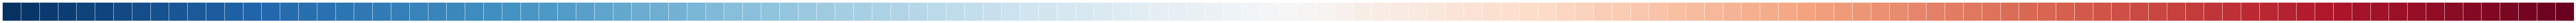

In [104]:
sns.palplot(sns.color_palette("RdBu_r", 139))[0]

In [105]:
sns.color_palette("RdBu_r", 139)[0]

(0.023913880225782301, 0.19653979615837922, 0.39192618984802097)

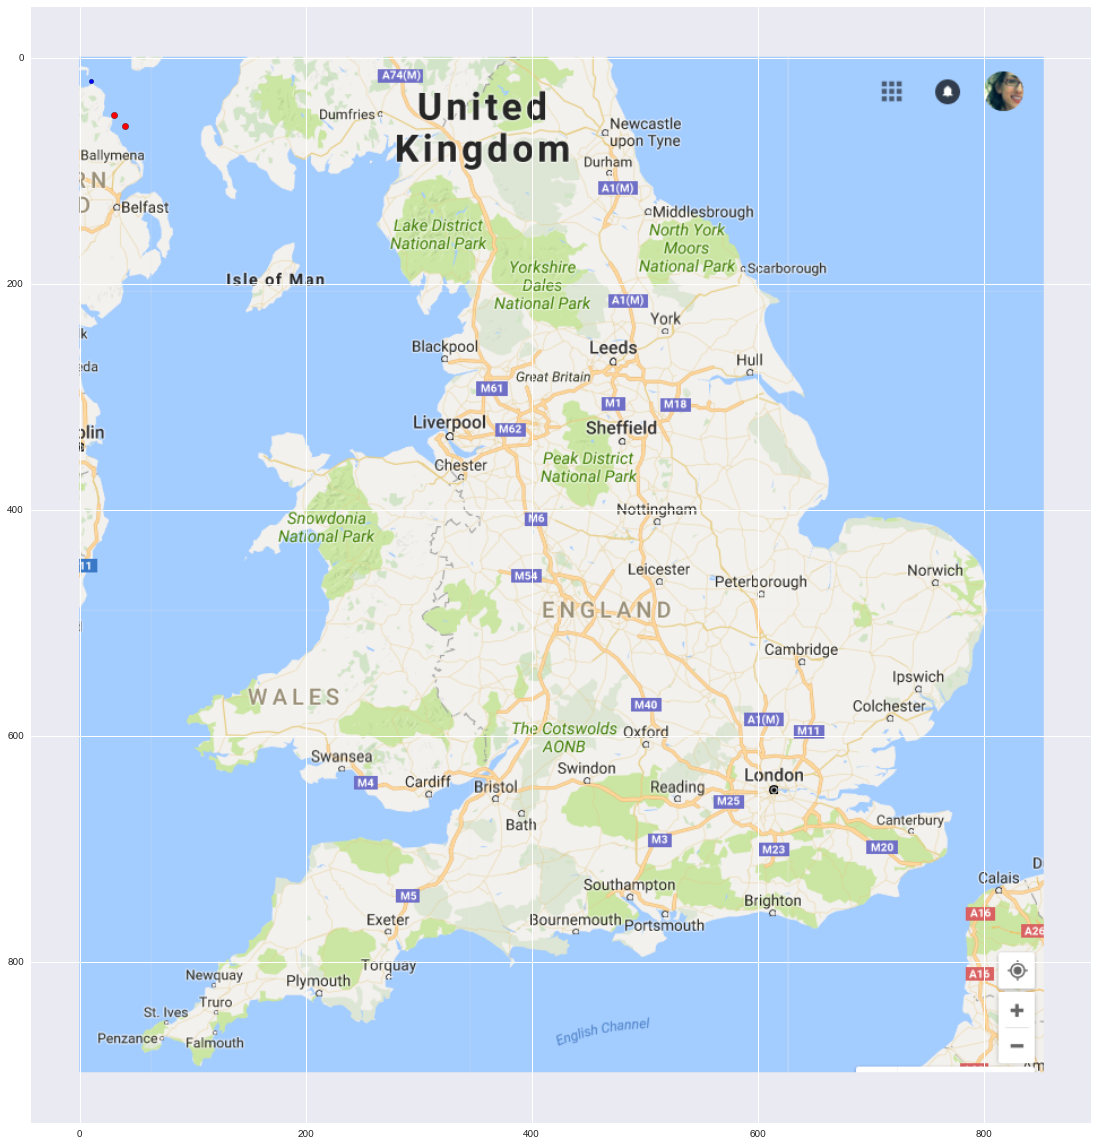

In [112]:
plt.figure(figsize=(20,20))
im = plt.imread('map.png')
implot = plt.imshow(im)

# put a blue dot at (10, 20)
plt.scatter([10], [20])

# put a red dot, size 40, at 2 locations:
plt.scatter(x=[30, 40], y=[50, 60], c='r', s=40)

plt.show()

In [177]:
with open('./data/season_table.json') as json_data:
    season_table = json.load(json_data)

In [178]:
season_table

{u'2001-2002': [{u'Leicester City': {u'dg': -34, u'pt': 28}},
  {u'Derby County': {u'dg': -29, u'pt': 30}},
  {u'Ipswich Town': {u'dg': -23, u'pt': 36}},
  {u'Sunderland': {u'dg': -22, u'pt': 40}},
  {u'Bolton Wanderers': {u'dg': -18, u'pt': 40}},
  {u'Everton': {u'dg': -12, u'pt': 43}},
  {u'Charlton Athletic': {u'dg': -11, u'pt': 44}},
  {u'Fulham': {u'dg': -8, u'pt': 44}},
  {u'Middlesboro': {u'dg': -12, u'pt': 45}},
  {u'Southampton': {u'dg': -8, u'pt': 45}},
  {u'Blackburn Rovers': {u'dg': 3, u'pt': 46}},
  {u'Tottenham Hotspur': {u'dg': -4, u'pt': 50}},
  {u'Aston Villa': {u'dg': -1, u'pt': 50}},
  {u'West Ham United': {u'dg': -9, u'pt': 53}},
  {u'Chelsea': {u'dg': 28, u'pt': 64}},
  {u'Leeds United': {u'dg': 16, u'pt': 66}},
  {u'Newcastle United': {u'dg': 22, u'pt': 71}},
  {u'Manchester United': {u'dg': 42, u'pt': 77}},
  {u'Liverpool': {u'dg': 37, u'pt': 80}},
  {u'Arsenal': {u'dg': 43, u'pt': 87}}],
 u'2002-2003': [{u'Sunderland': {u'dg': -44, u'pt': 19}},
  {u'West Bromwic

In [ ]:
rank_avg = {}
for i in season table:
    for j in in season_table[i]:
        rank_avg.setdefault(j,[])
        rank_avg[j].append()

In [183]:
df_table = pd.read_csv('./data/season_team_point_difGoal.csv')
df_table = df_table.drop(['Unnamed: 0'], 1)

In [184]:
df_table.head()

,season,team,pt,dg
0,2001-2002,Charlton Athletic,44.0,-11.0
1,2001-2002,Southampton,45.0,-8.0
2,2001-2002,Manchester United,77.0,42.0
3,2001-2002,Liverpool,80.0,37.0
4,2001-2002,Ipswich Town,36.0,-23.0


In [187]:
gr = df_table.pt.groupby(df_table['season'])
# gr = df['pt'].groupby(df[''])

In [189]:
gr.value_counts

<bound method SeriesGroupBy.value_counts of <pandas.core.groupby.SeriesGroupBy object at 0x000000000CCA0128>>

In [194]:
rank_avg = {}
for i in sorted(df_table.season.unique()):
    temp = df_table[df_table.season==i]
    temp = temp.reset_index(drop= True)
    temp = temp.sort(['pt','dg'], ascending=[0, 0])
    temp = temp.reset_index(drop= True)
    for j in range(len(temp)):
        rank_avg.setdefault(temp.team[j],[])
        rank_avg[temp.team[j]].append(j+1)
    


C:\Users\milanlouei.s\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [195]:
rank_avg

{'Arsenal': [1, 2, 1, 2, 4, 4, 3, 4, 3, 4, 3, 4],
 'Aston Villa': [8, 16, 6, 10, 16, 11, 6, 6, 6, 9, 16, 15],
 'Birmingham': [13, 10, 12, 18, 19, 9, 18],
 'Blackburn Rovers': [10, 6, 15, 15, 6, 10, 7, 15, 10, 15, 19],
 'Blackpool': [19],
 'Bolton Wanderers': [16, 17, 8, 6, 8, 7, 16, 13, 14, 14, 18],
 'Burnley': [18],
 'Charlton Athletic': [14, 12, 7, 11, 13, 19],
 'Chelsea': [6, 4, 2, 1, 1, 2, 2, 3, 1, 2, 6, 3],
 'Crystal Palace': [18],
 'Derby County': [19, 20],
 'Everton': [15, 7, 17, 4, 11, 6, 5, 5, 8, 7, 7, 6],
 'Fulham': [13, 14, 9, 13, 12, 16, 17, 7, 12, 8, 9, 12],
 'Hull City': [17, 19],
 'Ipswich Town': [18],
 'Leeds United': [5, 15, 20],
 'Leicester City': [20, 18],
 'Liverpool': [2, 5, 4, 5, 3, 3, 4, 2, 7, 6, 8, 7],
 'Manchester City': [9, 16, 8, 15, 14, 9, 10, 5, 3, 1, 2],
 'Manchester United': [3, 1, 3, 3, 2, 1, 1, 1, 2, 1, 2, 1],
 'Middlesboro': [12, 11, 11, 7, 14, 12, 13, 19],
 'Newcastle United': [4, 3, 5, 14, 7, 13, 12, 18, 12, 5, 16],
 'Norwich City': [19, 12, 11],
 'P

In [199]:
for i in rank_avg:
    avg = mean(rank_avg[i])
    rank_avg[i] = avg

In [198]:
avg

18.0

In [200]:
rank_avg

{'Arsenal': 2.9166666666666665,
 'Aston Villa': 10.416666666666666,
 'Birmingham': 14.142857142857142,
 'Blackburn Rovers': 11.636363636363637,
 'Blackpool': 19.0,
 'Bolton Wanderers': 12.454545454545455,
 'Burnley': 18.0,
 'Charlton Athletic': 12.666666666666666,
 'Chelsea': 2.75,
 'Crystal Palace': 18.0,
 'Derby County': 19.5,
 'Everton': 8.1666666666666661,
 'Fulham': 11.833333333333334,
 'Hull City': 18.0,
 'Ipswich Town': 18.0,
 'Leeds United': 13.333333333333334,
 'Leicester City': 19.0,
 'Liverpool': 4.666666666666667,
 'Manchester City': 8.3636363636363633,
 'Manchester United': 1.75,
 'Middlesboro': 12.375,
 'Newcastle United': 9.9090909090909083,
 'Norwich City': 14.0,
 'Portsmouth': 13.857142857142858,
 'Queens Park Rangers': 18.5,
 'Reading': 15.0,
 'Sheffield United': 18.0,
 'Southampton': 13.0,
 'Stoke City': 12.6,
 'Sunderland': 15.666666666666666,
 'Swansea City': 9.5,
 'Tottenham Hotspur': 7.416666666666667,
 'Watford': 20.0,
 'West Bromwich Albion': 15.0,
 'West Ham U

In [201]:

with open('./data/average_rank.json', 'w') as outfile:
    json.dump(rank_avg, outfile)

In [203]:
stadiums = pd.read_csv('./data/stadiums.csv')

df_rank_avg = pd.DataFrame(columns = ['team','avg_rank','stadium','latitude','longitude'], 
                          index = np.arange(0,len(team_top_scorer),1))


i=0
for c in rank_avg:
    df_rank_avg.team[i] = c
    df_rank_avg.avg_rank[i] = rank_avg[c]
    df_rank_avg.stadium[i] = stadiums.Name[stadiums.Team == c.reset_index(drop = True).ix[0] 
    df_rank_avg.latitude[i] = stadiums.Latitude[stadiums.Team == rank_avg.keys().reset_index(drop = True).ix[0] 
    df_rank_avg.longitude[i] = stadiums.Longitude[stadiums.Team == rank_avg.keys()[i]].reset_index(drop = True).ix[0] 


AttributeError: 'numpy.float64' object has no attribute 'keys'